# Classifying incidences of diabetes using k-means clustering

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline  

In [2]:
# Read in datasets
df = pd.read_csv('DiabetesDataset.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [4]:
# Replace Null ('0') values except Pregnancies
df.Glucose.replace(0, np.nan, inplace=True)
df.BloodPressure.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(0, np.nan, inplace=True)
df.Insulin.replace(0, np.nan, inplace=True)
df.BMI.replace(0, np.nan, inplace=True)
df.DiabetesPedigreeFunction.replace(0, np.nan, inplace=True)
df.Age.replace(0, np.nan, inplace=True)

In [5]:
# Keep only values with insulin records
all_insulin = df[np.isfinite(df['Insulin'])]

In [6]:
# Drop any remainig na values
patients = df.dropna()

In [7]:
patients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [8]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
Pregnancies                 392 non-null int64
Glucose                     392 non-null float64
BloodPressure               392 non-null float64
SkinThickness               392 non-null float64
Insulin                     392 non-null float64
BMI                         392 non-null float64
DiabetesPedigreeFunction    392 non-null float64
Age                         392 non-null int64
Outcome                     392 non-null int64
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [10]:
patients.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Create arrays for the features and the response variable
x = patients.drop(['Outcome'], axis=1).values
y = patients['Outcome'].values

In [12]:
print(x,y)

(array([[   1.   ,   89.   ,   66.   , ...,   28.1  ,    0.167,   21.   ],
       [   0.   ,  137.   ,   40.   , ...,   43.1  ,    2.288,   33.   ],
       [   3.   ,   78.   ,   50.   , ...,   31.   ,    0.248,   26.   ],
       ..., 
       [   2.   ,   88.   ,   58.   , ...,   28.4  ,    0.766,   22.   ],
       [  10.   ,  101.   ,   76.   , ...,   32.9  ,    0.171,   63.   ],
       [   5.   ,  121.   ,   72.   , ...,   26.2  ,    0.245,   30.   ]]), array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1

In [13]:
# Split the data into test and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42, stratify=y)

In [14]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [15]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

In [16]:
# Print the accuracy
print("ACCURACY: ")
print(" ")
print(knn.score(x_test, y_test))

ACCURACY: 
 
0.796610169492


In [17]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(x_test)

In [18]:
# Generate the confusion matrix and classification report
print("CONFUSION MATRIX: ") 
print(" ")
print(confusion_matrix(y_test, y_pred))
print(" ")
print("CLASSIFICATION REPORT: ")
print(" ")
print(classification_report(y_test, y_pred))

CONFUSION MATRIX: 
 
[[71  8]
 [16 23]]
 
CLASSIFICATION REPORT: 
 
             precision    recall  f1-score   support

          0       0.82      0.90      0.86        79
          1       0.74      0.59      0.66        39

avg / total       0.79      0.80      0.79       118



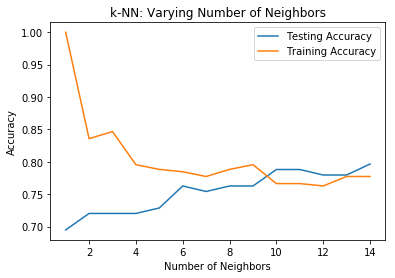

In [20]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()